# STATS 306 Fall 2021
## Homework 5: Data Transformation, EDA, and Tidy Data 30 points

**Assigned:** 09/30/2021 

**Due:** 10/07/2020 by 11:59pm

Your uniqid: `<replace with your uniqid>`

For your homework, you will be using the packages `tidyverse`, `nycflights13`, and `cfb.RData`.  The `flights` data set will be available after loading the library `nycflights13`.   

In [2]:
library(tidyverse)
library(nycflights13)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Problem 1, More About Flight Data 10 points

**(a)**
The following code adds a variable `week` to `flights`, such that `week==1` for the first seven days of the year, `week==2` for days 8-14, etc. (In the second half of the semester we will learn how to manipulate dates using the `lubridate` package.)

In [3]:
flights_week <- mutate(flights, week=lubridate::week(time_hour))

Let a flight's "positive arrival delay" be defined as the larger of `arr_delay` and zero. We say a flight is *ridiculously late* if its arrival delay was more than 15 times the average positive arrival delay for all flights in that week.
- Use the `flights_week` table to calculate the number of ridiculously late flights in each week of the year. For example, in the first week of the year there were 23 ridiculously late flights.
- Also add in the total number of flights in the data set for each week. 

Sort the resulting table in descending order of the number of ridiculously late flights and store it in a variable called `table1`. The table should have three columns, `week`, `n`, and `n_ridiculously_late`. _3 points_

*Hint*: You may find the function `pmax` helpful.

**(b)** Use your solution in part 1(a) to generate a bar plot of the number of ridiculously late flights each week. Give your plot an appropriate title and axis labels. _2 points_

**(c)**
Your plot from the preceding problem should exhibit a curious feature: in a couple of weeks there were far fewer ridiculously late flights than the rest. 
- Investigate this further by determining the fraction of departure times which were missing in each week. For example, in week 1, 0.57% of flights had missing departure times.
- Additionally, rank each week by this fraction. The week with the highest fraction of missing departure times should have rank one, second highest rank two, and so on.

Store the result in a variable called `table2`. 
Your table should have three columns: `week`, `frac_miss_dep_time` and `rank`. Sort your table in ascending order of `rank`. _2 points_

**(d)**
For the week with the highest fraction of missing departure times in problem 1(c), generate a table `table3` which shows the total number of missing departure times for each hour and day of that week. Your table should have columns `year`, `month`, `day`, `hour`, and `n_miss_dep_time`. Sort your table in chronological order. _3 points_

## Problem 2: Football data 14 points
The next few questions use a new data set. The file `cfb.RData` contains a table called `cfb` with information on 5,116 college football games played since 2011. 

In [12]:
load("cfb.RData")
print(cfb)

# A tibble: 5,116 × 50
    year  game count conf_game week  winning           winning_confere… winning_h_a_n
   <int> <int> <int> <chr>     <chr> <chr>             <chr>            <chr>        
 1  2011     1     1 Y         1     FIU               Sun Belt         H            
 2  2011     2     1 N         1     Wisconsin         Big 10           H            
 3  2011     3     1 N         1     Mississippi State SEC              A            
 4  2011     4     1 N         1     Syracuse          Big East         H            
 5  2011     5     1 N         1     Bowling Green     MAC              A            
 6  2011     6     1 N         1     Kentucky          SEC              N            
 7  2011     7     1 N         1     Baylor            Big 12           H            
 8  2011     8     1 N         1     Ohio State        Big 10           H            
 9  2011     9     1 N         1     Missouri          Big 12           H            
10  2011    10     1 N         

**(a)**
College football is divided into various conferences. (UMich is in the Big Ten conference.) A conference game is a game where the `winning_conference` and `losing_conference` are the same. For example, row 4631 of CFB is a conference game between Western Michigan and Buffalo, both in the Mid-American Conference. A total of 139 points were scored.

In [26]:
cfb %>% slice(4631) %>% 
    select(winning, winning_conference, winning_points, 
           losing, losing_conference, losing_points)

winning,winning_conference,winning_points,losing,losing_conference,losing_points
<chr>,<chr>,<int>,<chr>,<chr>,<int>
W. Michigan,MAC,71,Buffalo,MAC,68


Certain conferences have a reputation for being higher scoring. Investigate this by restricting to conference games and producing a box-and-whisker plot that shows the distribution of total number of points scored per game (ppg) by conference. Ensure that the conference names in the plot are legible, and sort the conferences in order of the median ppg. `4 points`

* `conf_game` records whether the row is a conference game
* `winning_points` records number of  points for the winning team
* `losing_points` records number of points for the losing team
* `winning_conference` records the conference name


**(b)** In your above plot, you may find that there is a `Big12` as well as `Big 12` conference.  `Big12` is likely a typo.  Modify your above code to reproduce a boxplot where the name `Big12` is changed to `Big 12`.  _2 points_

**(c)**
Compute the yearly winning percentage for Michigan and Ohio State. Your table should looks like the following. _2 points_

* `winning` records the winning team
* `losing` records the losing team


`summarise()` ungrouping output (override with `.groups` argument)



year,Michigan,Ohio
<int>,<dbl>,<dbl>
2011,0.8461538,0.4615385
2012,0.5833333,1.0000000
2013,0.5384615,0.8461538
2014,0.3636364,0.9333333
2015,0.7692308,0.9230769
2016,0.7692308,0.8461538
2017,0.6153846,0.8571429


**(d)**
Now plot the following line chart.  Note that the above data set that you have created is not tidy for plotting the following line chart.  You may want to transform it into a long data set by using the `gather` function. _2 points_

`summarise()` ungrouping output (override with `.groups` argument)



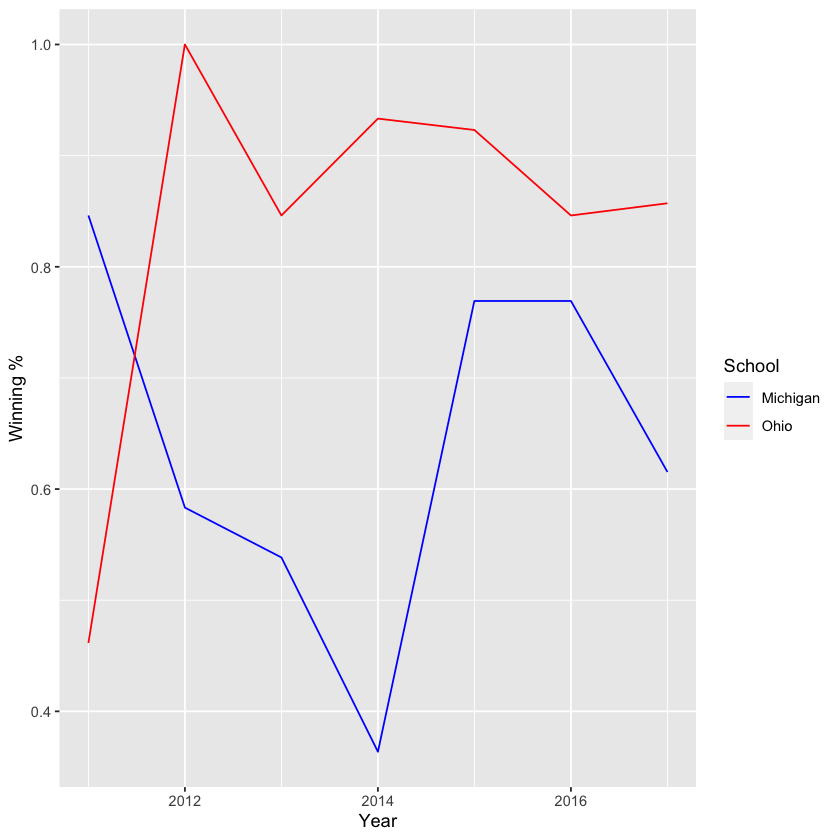

**(e)**
The column `cfb$winning_h_a_n` tells whether the winning team was playing at <strong>H</strong>ome, <strong>A</strong>way, or <strong>N</strong>either. Define the home team's *margin* to be the difference between home team's score and the away team's score. For example, the first game in CFB was played between FIU and North Texas, at FIU, and FIU won 41-16. Therefore the home team's margin was 25 points for this game.

Use `cfb` to generate a vector called `home_margin` which contains the home team's margin for each game. (Omit any games that do not have a home team.) The first few entries of `cfb` are `25, 34, -45, 7, -17, ...` _2 points_


**(f)**
The "home field advantage" refers to the idea that a team tends to do better when playing at home. Plot a histogram of home_margin.  Can you conclude that there exists a home field advantage? _2 points_

Hint: You may find the following function useful `t.test()` for performing one-sample t-test that you have learnt in STATS 250.  
In STATS 250 you [learned](https://www.youtube.com/watch?v=6gfMhsWmnwk) how to test for differences in proportions between two populations.

## Problem 3: Admission Data  (6 points)

In the following problem, we will take a look at a dataset called `UCBAdmissions`. This contains graduate school admissions data from 1973 for six departments at UC Berkeley. For privacy reasons the names of the departments have been changed to `A`, `B`, ... , `F`.

In [50]:
data(UCBAdmissions)
ucb <- tbl_df(UCBAdmissions) %>% print

Warning message:
“`tbl_df()` is deprecated as of dplyr 1.0.0.
Please use `tibble::as_tibble()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


# A tibble: 24 x 4
   Admit    Gender Dept      n
   <chr>    <chr>  <chr> <dbl>
 1 Admitted Male   A       512
 2 Rejected Male   A       313
 3 Admitted Female A        89
 4 Rejected Female A        19
 5 Admitted Male   B       353
 6 Rejected Male   B       207
 7 Admitted Female B        17
 8 Rejected Female B         8
 9 Admitted Male   C       120
10 Rejected Male   C       205
# … with 14 more rows


**(a)** Using the tool(s) we learned for summarizing and manipulating tidy data, create a summary table from `ucb` which shows the acceptance rate by gender. Your table should have four columns: `Gender`, `Admitted`, `Rejected`, and `Proportion Admitted`. You may find the function `spread` helpful.

<table>
<thead><tr><th scope="col">Gender</th><th scope="col">Admitted</th><th scope="col">Rejected</th><th scope="col">Proportion Admitted</th></tr></thead>
<tbody>
	<tr><td>Female   </td><td> 557     </td><td>&dash;     </td><td>&dash;</td></tr>
	<tr><td>Male     </td><td> &dash;     </td><td>&dash;     </td><td>0.4451877</td></tr>
</tbody>
</table>

(A few entries have been provided for you; your job is to write code that will produce the complete table with no blanks.)

Store the resulting tibble in a variable called `table1`. _3 points_. 

**(b)**
Reproduce the table from **3(a)** , but now stratify by department. 
Compute the male and female acceptance proportion for each department separately.
Your resulting table should look like the following. Note that the following table only contains several entries to help you check your work, it is your job to provide code that computes the entire table automatically.

Store your resulting table in a variable called `table3`.  _3 points_

Hint: You may want to use the functions `unite` and `spread`.


<table>
<thead><tr><th scope="col">Dept</th><th scope="col">Female_Admitted</th><th scope="col">Female_Rejected</th><th scope="col">Male_Admitted</th><th scope="col">Male_Rejected</th><th scope="col">Male Proportion Admitted</th><th scope="col">Female Proportion Admitted</th></tr></thead>
<tbody>
	<tr><td>A         </td><td> 89      </td><td> &dash;       </td><td>&dash;       </td><td>&dash;       </td><td>&dash;</td><td>&dash;</td></tr>
	<tr><td>B         </td><td> &dash;       </td><td>  &dash;       </td><td>353</td><td>&dash;       </td><td>&dash;</td><td>&dash;</td></tr>
	<tr><td>C         </td><td> &dash;       </td><td>  391	     </td><td>&dash;</td><td>&dash;       </td><td>&dash;</td><td>&dash;</td></tr>
	<tr><td>D         </td><td> &dash;       </td><td>  &dash;       </td><td>&dash;</td><td>&dash;       </td><td>0.33093525	</td><td>&dash;</td></tr>
	<tr><td>E         </td><td> &dash;       </td><td>  &dash;       </td><td>&dash;</td><td>138       </td><td>&dash;</td><td>&dash;</td></tr>
 	<tr><td>F         </td><td> &dash;       </td><td>  &dash;       </td><td>&dash;</td><td>&dash;       </td><td>&dash;</td><td>0.07038123</td></tr>

</tbody>
</table>